### DESCRIPTION
Reduce the time a Mercedes-Benz spends on the test bench.
#### Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

### Following actions should be performed:
•	If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
•	Check for null and unique values for test and train sets.
•	Apply label encoder.
•	Perform dimensionality reduction.
•	Predict your test_df values using XGBoost.



In [55]:
#import all dependencies regarding this projects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the datasets


In [56]:
#Import the Data from your drive, in this case, we are using train.csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:

!ls /content/train.csv

/content/train.csv


In [58]:
#unzip our train Model:
!unzip /content/train.zip

Archive:  /content/train.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: No


In [59]:
#unzip our test Model:
!unzip /content/test.zip

Archive:  /content/test.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: No


In [60]:
#Read Train Data
train_data = pd.read_csv('/content/train.csv') 

In [61]:
#Read Test data
test_data = pd.read_csv('/content/test.csv') 

In [62]:
#Read first 5 rows from the train dataset
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#Read first 5 rows from the test dataset
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [64]:
#check how many rows and columns in that train dataset
print(train_data.shape)

(4209, 378)


In [65]:
#check how many rows and columns in that test dataset
print(test_data.shape)

(4209, 377)


In [66]:
#print the train data type equal to object from its columns
for i in train_data.columns:
      data_type=train_data[i].dtype
      if data_type =='object':
         print(i)

X0
X1
X2
X3
X4
X5
X6
X8


In [67]:
#print the train data columns
train_data.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [68]:
#print test data columns
test_data.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

### Following actions should be performed:

#### 1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [69]:
#check variance for train data
variance = pow(train_data.drop(columns={'ID','y'}).std(),2).to_dict()
null_content=0
for key,value in variance.items():
    if(value==0):
        print('Name',key)
        null_content=null_content+1
print('Number of columns which has zero variance=',null_content)

Name X11
Name X93
Name X107
Name X233
Name X235
Name X268
Name X289
Name X290
Name X293
Name X297
Name X330
Name X347
Number of columns which has zero variance= 12


In [70]:
#refined train dataset
train_data = train_data.drop(columns={'X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'})


In [71]:
train_data.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0


In [72]:
# now again check its shape
train_data.shape

(4209, 366)

### Check for null and unique values for test and train sets.


In [73]:
train_data.isnull().sum().any()

False

In [127]:
train_data.nunique()


ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 366, dtype: int64

In [74]:
test_data.isnull().sum().any()

False

## Apply label encoder


In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [76]:
train_data_feature = train_data.drop(columns={'y','ID'})
train_data_target=train_data.y

In [77]:
#check train data feaures with removing the two columns y and ID
train_data_feature.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0


In [78]:
#read train data target
train_data_target.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [79]:
print(train_data_feature.shape)

(4209, 364)


In [80]:
print(train_data_target.shape)

(4209,)


In [81]:
train_data_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [82]:
le=LabelEncoder()
train_data_feature['X0']=le.fit_transform(train_data_feature.X0)
train_data_feature['X1']=le.fit_transform(train_data_feature.X1)
train_data_feature['X2']=le.fit_transform(train_data_feature.X2)
train_data_feature['X3']=le.fit_transform(train_data_feature.X3)
train_data_feature['X4']=le.fit_transform(train_data_feature.X4)
train_data_feature['X5']=le.fit_transform(train_data_feature.X5)
train_data_feature['X6']=le.fit_transform(train_data_feature.X6)
train_data_feature['X8']=le.fit_transform(train_data_feature.X8)

### Performing Dimensionality Reduction

In [83]:
print(train_data_feature.shape)
print(train_data_target.shape)

(4209, 364)
(4209,)


In [84]:
train_data_feature.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
train_data_target.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [86]:
from sklearn.decomposition import PCA
pca =PCA(n_components=.95)
pca.fit(train_data_feature,train_data_target)

PCA(n_components=0.95)

In [87]:
train_data_feature_trans = pca.fit_transform(train_data_feature)
print(train_data_feature_trans.shape)

(4209, 6)


### Predict your test_df values using XGBoost
##### Building model using the train data set

In [88]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [145]:
train_x,test_x,train_y,test_y = train_test_split(train_data_feature_trans,train_data_target,test_size=0.3,random_state=42)
print(train_x)
print(train_x.shape)
print(train_y)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

[[ -4.93605368  -0.27054066  -1.30726935   5.53512489   7.026251
    0.76456379]
 [ 12.83201458  -5.55110541   5.31374128  -9.33512195   4.75620052
   -2.50888442]
 [ -3.88052415  -1.43183621  -2.4579114   -6.640973     9.64997736
    5.03187134]
 ...
 [-14.5215608   -9.61792671  14.86164751   8.87875534 -12.08761116
   -2.14666264]
 [-14.40704297  -4.81799916  15.40056668   2.44026604 -12.49849932
   -1.76158815]
 [  1.74848306 -11.74061329 -13.31469243  -4.06381137   5.77919191
   -1.99184404]]
(2946, 6)
370      95.13
3392    117.36
2208    109.01
3942     93.77
1105    103.41
         ...  
3444    109.42
466      78.25
3092     92.18
3772     91.92
860      87.71
Name: y, Length: 2946, dtype: float64
(2946,)
(1263, 6)
(1263,)


In [150]:
xgb_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.3)
model=xgb_reg.fit(train_x,train_y)
print('RMSE=',sqrt(mean_squared_error(model.predict(test_x),test_y)))

[12:16:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 11.862013277134434


##### RMSE value is 11.86 approximately after tuning the hyperparameters to attain minimum RMSE.

<Figure size 720x360 with 0 Axes>

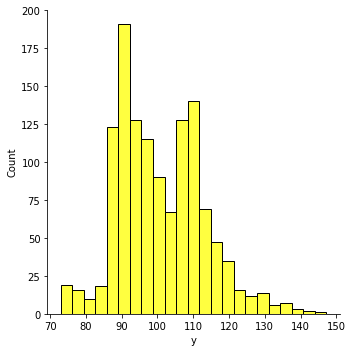

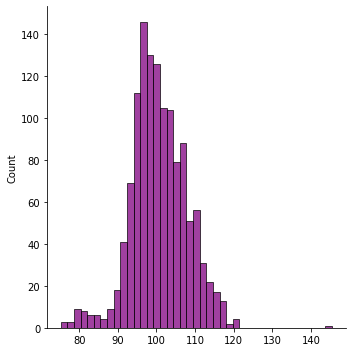

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
pred_test_y=model.predict(test_x)
plt.figure(figsize=(10,5))
sns.displot(test_y[test_y<150],color="yellow",label="Actual Value")
sns.displot(pred_test_y[pred_test_y<150],color="purple",label="predicted value")
plt.tight_layout()

### K-fold cross validation using XGBoost

In [162]:
dmatrix_train=xgb.DMatrix(data=train_data_feature_trans,label=train_data_target)
params={'objective':'reg:linear','colsample_bytree':0.3,'learning_rate':0.3}
model_cv=xgb.cv(dtrain=dmatrix_train,params=params,nfold=3,num_boost_round=50,early_stopping_rounds=10)
model_cv.tail(7)

[12:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
14,9.522768,0.160652,11.322655,0.461470
15,9.337600,0.084872,11.239625,0.403196
16,9.221181,0.120630,11.235019,0.400872
17,9.128593,0.117134,11.233501,0.403180
18,8.981157,0.098661,11.196246,0.371889
19,8.903264,0.067039,11.184492,0.338490
20,8.818598,0.100212,11.181896,0.333461


##### By using k-fold cross validation, RMSE is reduced by approximately 10%,RMSE=11.18

### Prediction with Test Data set using XGBoost
#### prepare the test data

In [164]:
#test data preparation with drop columns and now its measure its shape
test_data = test_data.drop(columns={'X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'})
test_data.shape

(4209, 365)

In [165]:
test_data.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0


In [166]:
test_data.isnull().sum().any()

False

In [167]:
#import Label Encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder

In [168]:
#now drop the ID column from test data features and now take its shape
test_data_feature = test_data.drop(columns={'ID'})
print(test_data_feature.shape)

(4209, 364)


In [169]:
##now check its head value
test_data_feature.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [170]:
test_data_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [171]:
#init the Label Encoder
le=LabelEncoder()
test_data_feature['X0']=le.fit_transform(test_data_feature.X0)
test_data_feature['X1']=le.fit_transform(test_data_feature.X1)
test_data_feature['X2']=le.fit_transform(test_data_feature.X2)
test_data_feature['X3']=le.fit_transform(test_data_feature.X3)
test_data_feature['X4']=le.fit_transform(test_data_feature.X4)
test_data_feature['X5']=le.fit_transform(test_data_feature.X5)
test_data_feature['X6']=le.fit_transform(test_data_feature.X6)
test_data_feature['X8']=le.fit_transform(test_data_feature.X8)

In [172]:
#check the first five rows
test_data_feature.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [173]:
#check the data shape
test_data_feature.shape

(4209, 364)

In [174]:

test_data_feature.dtypes.value_counts()

int64    364
dtype: int64

The Principal Component Analysis is a popular unsupervised learning technique for reducing the dimensionality of data. It increases interpretability yet, at the same time, it minimizes information loss. It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D

In [175]:
pca.fit(test_data_feature)

PCA(n_components=0.95)

In [176]:
test_data_feature_trans=pca.fit_transform(test_data_feature)
print(test_data_feature_trans.shape)

(4209, 6)


In [177]:
#print the test_data_features_transaction
print(test_data_feature_trans)

[[ 14.58336183  14.16672593  13.53857566   2.40835691  11.31942221
    6.94220721]
 [-15.25161267  -7.73675643  -7.45495068  -2.66203503  11.59379316
    1.15940345]
 [ 11.8564649   -1.68017324  -9.9896148   14.91886587  -1.08886021
   -2.69130553]
 ...
 [-13.44644008   3.2885825   -6.85236431  18.91025575  11.32365564
    3.22410016]
 [ 24.92612317  -4.89888683 -10.16941028  11.44337736   5.90178724
    4.55323232]
 [-15.38430989  -7.73425491 -15.4930104   -0.5595126    4.7793639
    1.0829113 ]]


In [178]:
test_pred=model.predict(test_data_feature_trans)

In [179]:
##check the prediction accuracy
test_pred

array([ 78.98225,  94.71516, 100.49405, ...,  93.33804, 119.07449,
        97.9292 ], dtype=float32)

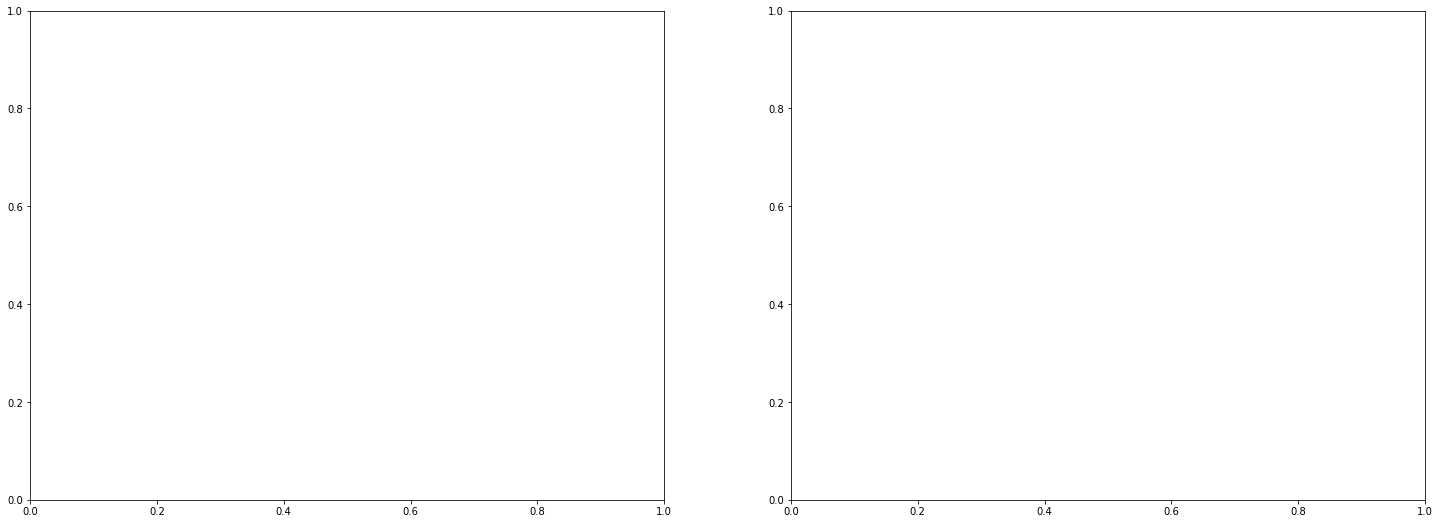

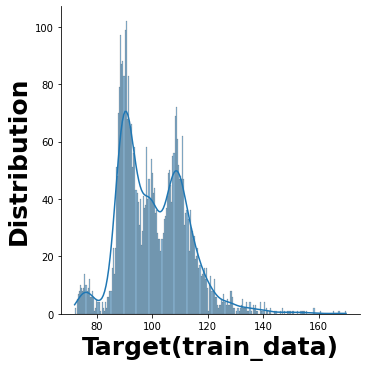

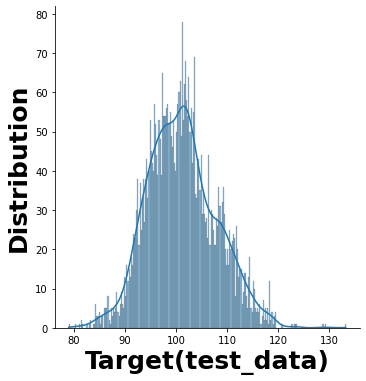

In [183]:
fig,ax=plt.subplots(1,2, figsize=(25,9))
train_plot=sns.displot(train_data_target[train_data_target<250],bins=250,kde=True)
train_plot.set_xlabels('Target(train_data)',weight='bold',size=25)
train_plot.set_ylabels('Distribution',weight='bold',size=25)
train_plot.set_titles('Dist for target for train data',weight='bold',size=25)
test_plot=sns.displot(test_pred[test_pred<250],bins=250,kde=True,ax=ax[1])
test_plot.set_xlabels('Target(test_data)',weight='bold',size=25)
test_plot.set_ylabels('Distribution',weight='bold',size=25)
test_plot.set_titles('Dist for target for test data',weight='bold',size=25)
plt.show()